<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products with sell more. 

## Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
# YOUR CODE HERE
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell

import pandas as pd
past = pd.read_csv('../dat/past.csv.gz')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the classification perspective, is the data balanced?

In [2]:
past[past['Purchased?']==1]['Purchased?'].value_counts().iloc[0]/len(past)# YOUR CODE HERE .3448

0.3438

In [3]:
for col in ['NumOfEventsInJourney', 'NumSessions','interactionTime','NumCart', 'NumView',\
           'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove']:
    print(col, '\n')
    print(past.groupby('Purchased?')[col].mean())
    print(30*'---')

NumOfEventsInJourney 

Purchased?
0    1.872303
1    2.101440
Name: NumOfEventsInJourney, dtype: float64
------------------------------------------------------------------------------------------
NumSessions 

Purchased?
0    1.287649
1    1.402259
Name: NumSessions, dtype: float64
------------------------------------------------------------------------------------------
interactionTime 

Purchased?
0    212101.185942
1    319495.639610
Name: interactionTime, dtype: float64
------------------------------------------------------------------------------------------
NumCart 

Purchased?
0    0.513844
1    0.595602
Name: NumCart, dtype: float64
------------------------------------------------------------------------------------------
NumView 

Purchased?
0    0.880742
1    0.918394
Name: NumView, dtype: float64
------------------------------------------------------------------------------------------
NumRemove 

Purchased?
0    0.389842
1    0.458922
Name: NumRemove, dtype: float64
-------

<span style="color:green">**Answer**</span>

No, the dataset is not balanced. We don't have the metadata and also the data is preprocessed and aggregated. So it is not possible to analyze this accurately. But taking a look at the session features we can conclude that most people window shop and they remove items they added to the cart. 


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [4]:
X = past.drop(columns=['product_id', 'user_id'])# YOUR CODE HERE
y = X.pop('Purchased?')


In [5]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to an numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [6]:
X.columns
X[['Fr', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', 'NumOfEventsInJourney', 'NumSessions', ]].head() #? it doen'st look like OHE 

Index(['NumOfEventsInJourney', 'NumSessions', 'interactionTime', 'maxPrice',
       'minPrice', 'NumCart', 'NumView', 'NumRemove', 'InsessionCart',
       'InsessionView', 'InsessionRemove', 'Weekend', 'Fr', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', '2019', '2020', 'Jan', 'Feb', 'Oct', 'Nov',
       'Dec', 'Afternoon', 'Dawn', 'EarlyMorning', 'Evening', 'Morning',
       'Night', 'Noon', 'Category'],
      dtype='object')

,Fr,Mon,Sat,Sun,Thu,Tue,Wed,NumOfEventsInJourney,NumSessions
0,0.000,0.333333,0.000,0.00,0.333333,0.000,0.333333,1.333333,1.333333
1,0.000,0.250000,0.000,0.25,0.000000,0.250,0.250000,2.250000,1.500000
2,0.250,0.250000,0.250,0.25,0.000000,0.000,0.000000,1.000000,1.000000
3,0.000,0.250000,0.250,0.00,0.250000,0.250,0.000000,1.500000,1.500000
4,0.125,0.125000,0.375,0.00,0.250000,0.125,0.000000,1.875000,1.375000


In [7]:
X[['Afternoon', 'Dawn', 'EarlyMorning', 'Evening', 'Morning',
       'Night', 'Noon']].head()

,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon
0,0.000,0.0,0.666667,0.333333,0.00,0.00,0.00
1,0.750,0.0,0.000000,0.250000,0.00,0.00,0.00
2,0.000,0.0,0.000000,0.750000,0.25,0.00,0.00
3,0.000,0.0,0.000000,0.500000,0.00,0.25,0.25
4,0.375,0.0,0.125000,0.250000,0.25,0.00,0.00


In [8]:
X.columns#describe()

Index(['NumOfEventsInJourney', 'NumSessions', 'interactionTime', 'maxPrice',
       'minPrice', 'NumCart', 'NumView', 'NumRemove', 'InsessionCart',
       'InsessionView', 'InsessionRemove', 'Weekend', 'Fr', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', '2019', '2020', 'Jan', 'Feb', 'Oct', 'Nov',
       'Dec', 'Afternoon', 'Dawn', 'EarlyMorning', 'Evening', 'Morning',
       'Night', 'Noon', 'Category'],
      dtype='object')

In [9]:
duplicate_user_ids = pd.DataFrame(past['user_id'].value_counts()).reset_index()
duplicate_user_ids.rename(columns={'index':'user_id', 'user_id':'count'}, inplace=True)
duplicate_user_ids= duplicate_user_ids[duplicate_user_ids['count']!=1]
duplicate_user_ids

,user_id,count
0,568233448.0,3
1,609977037.0,3
2,438810803.0,2
3,539462974.0,2
4,500179293.0,2
5,610001725.0,2
6,501905379.0,2
7,584773829.0,2
8,442508971.0,2
9,497593427.0,2


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5, whiten=True,random_state=42)
X_reduced = pca.fit_transform(X_scaled)# YOUR CODE HERE

In [11]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [12]:
# YOUR CODE HERE
print('the percentage of variance explained by each of the selected components:\n',pca.explained_variance_ratio_)

the percentage of variance explained by each of the selected components:
 [0.10281916 0.09445882 0.06506113 0.05100071 0.04255629]


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [13]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [14]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

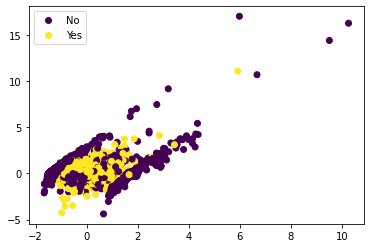

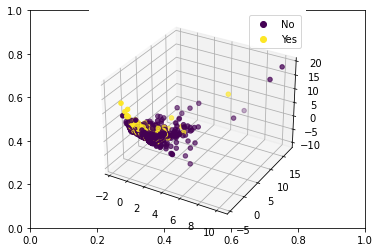

In [15]:
visualize_2pcs(X_reduced, y)# YOUR CODE HERE
visualize_3pcs(X_reduced, y)# YOUR CODE HERE


7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( do you consider data is balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [16]:
past['Purchased?'].value_counts()/len(past)

0    0.6562
1    0.3438
Name: Purchased?, dtype: float64

In [17]:
# YOUR CODE HERE (imports!)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.2, random_state=0)
    if standardize:
        pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(class_weight='balanced'))])
    else:
        pipe = Pipeline([('lr', LogisticRegression(class_weight='balanced'))])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))


Now apply the pipeline on the all the features `X` and review the performance

In [18]:
train(X,y)# YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



<details>
<summary> Expected output </summary>

```
  precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000
```
</details>

Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

<span style="color:green">**Answer**</span>
No, because we already scaled it. 

In [19]:
train(X_reduced, y, standardize=False)

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       649
           1       0.49      0.53      0.51       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.65      0.65      0.65      1000



<details>
<summary> Expected output </summary>

```
 precision    recall  f1-score   support

           0       0.74      0.70      0.72       649
           1       0.49      0.54      0.51       351

    accuracy                           0.64      1000
   macro avg       0.61      0.62      0.62      1000
weighted avg       0.65      0.64      0.65      1000
```
</details>

8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 

<span style="color:green">**Answer**</span>
Only recall increased a bit; precision and f1-score worsened. Yes, it's expected because we are losing some data. 

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [20]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [21]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        inertias.append(KMeans(n_clusters=k, random_state=10).fit(X).inertia_)
    plt.plot(ks, inertias,'o-')
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

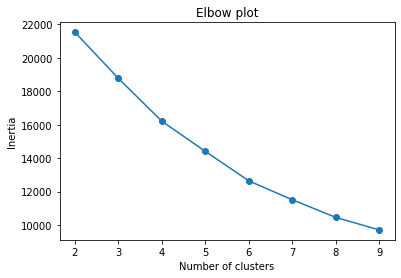

In [22]:
# YOUR CODE HERE
visualize_elbow(X_reduced,list(range(2,10)))

4. What are the disadvantage to use the Elbow method? 

<span style="color:green">**Answer**</span>

It is not always clear what the good value of k is because there is no elbow as in the plot above. And even when there is an elbow, we might miss a cluster if we choose the smaller k. 

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [23]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.2000007668861958
For n_clusters = 3 The average silhouette_score is : 0.210243895466403
For n_clusters = 4 The average silhouette_score is : 0.2194806464334678
For n_clusters = 5 The average silhouette_score is : 0.22511944439153694
For n_clusters = 6 The average silhouette_score is : 0.2114012680675046
For n_clusters = 7 The average silhouette_score is : 0.2126166818524468
For n_clusters = 8 The average silhouette_score is : 0.22080792678126532


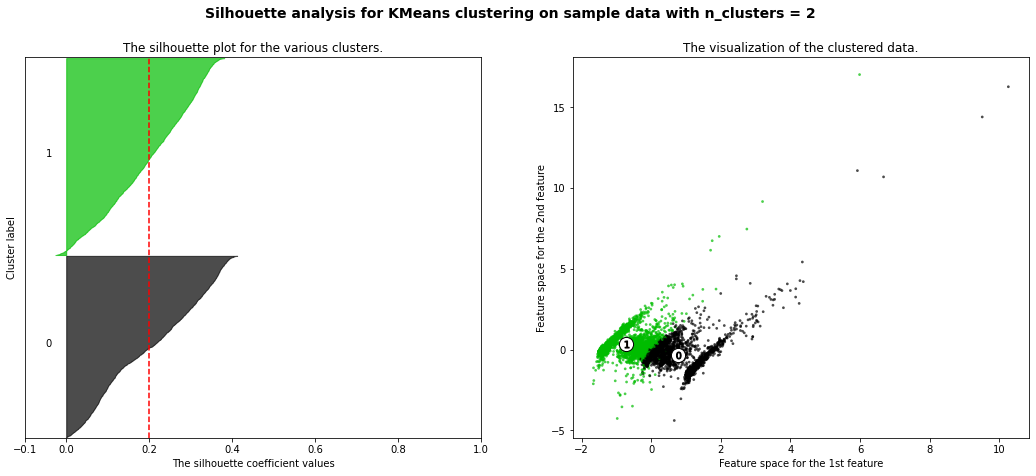

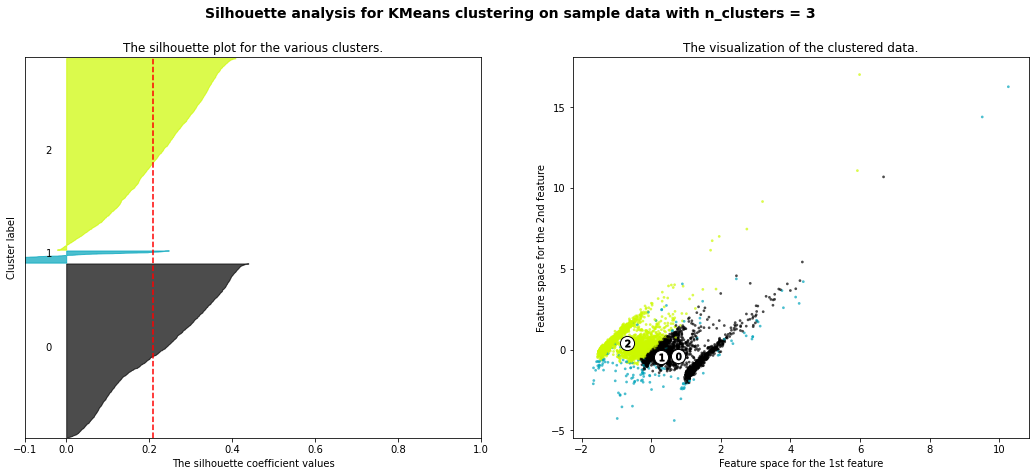

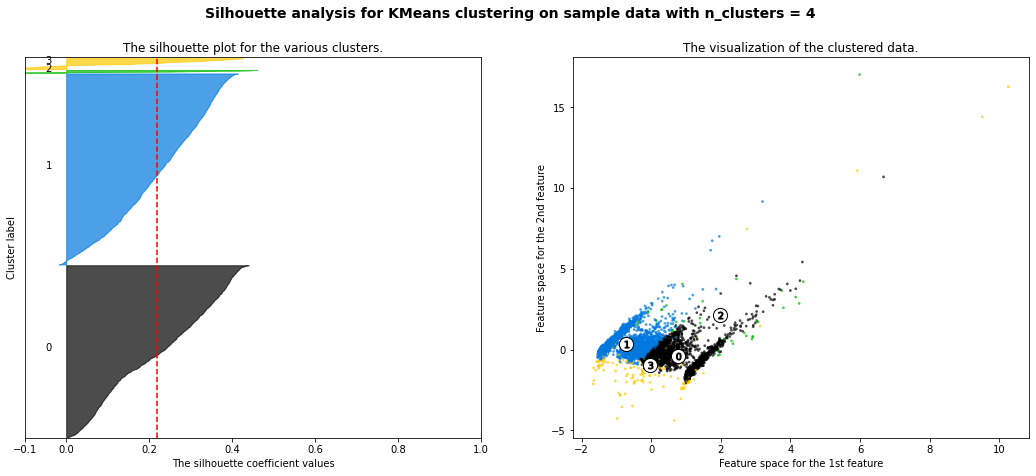

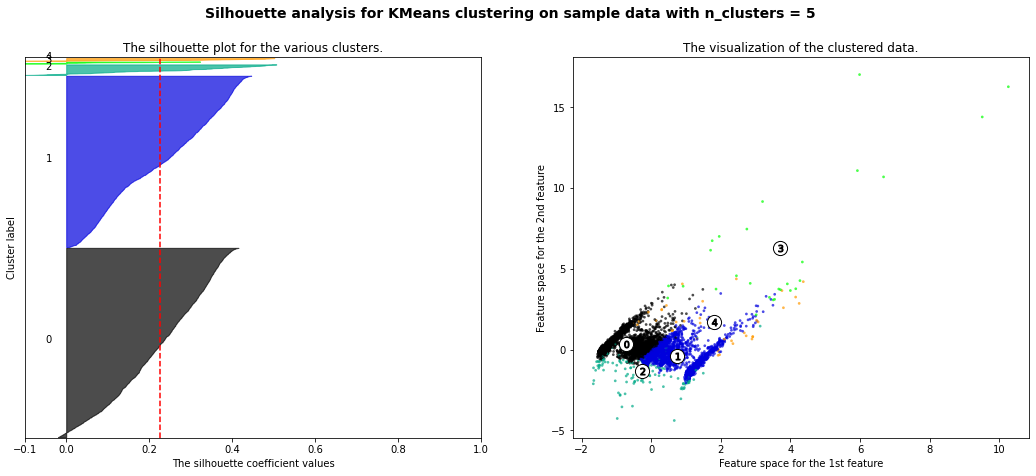

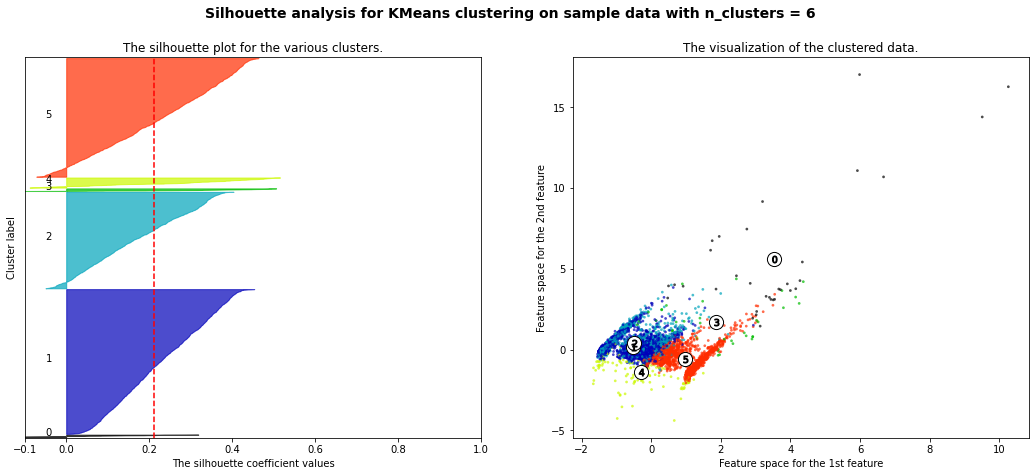

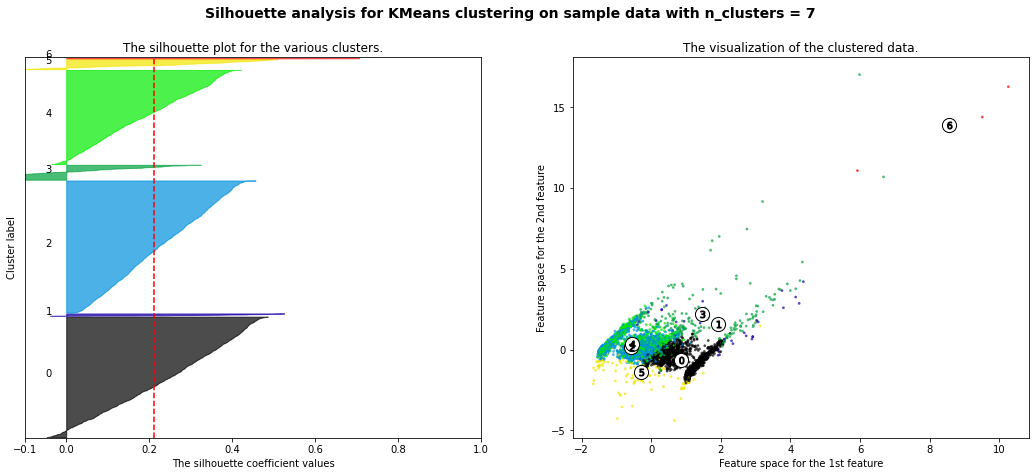

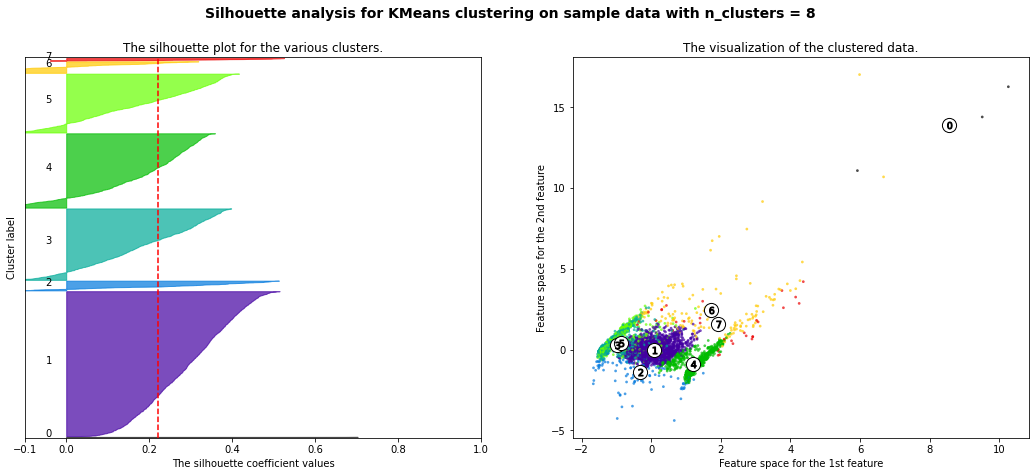

In [24]:
# YOUR CODE HERE
visualize_silhouette(max_clusters=8, X=X_reduced)

<span style="color:green">**Answer**</span>

1. We don't want scores less than the average silhouette score.
2. We don't want negative scores as they mean that the sample was assigned to the wrong cluster. 
3. Scores near 0 indicate overlapping clusters (close to the decision boundary)

Given the above, the silhouette scores above are not very high. Silhouette scores of near 1 indicate dense clusters and these scores are just around 0.20.

1. All of the clusters pass in all plots pass the average. 
2. All the plots have clusters with negative values.
3. 
The highest scores are for n_clusters:
    - 5: 0.225 (4 clusters with negative values)
    - 8: 0.220 (7 clusters with negative values
    - 4: 0.219 (2 clusters with negative values)
    
It looks like 4 clusters is the best choice. However, cluster 2 looks very neat albeit having the lowest score.

6. Instantiate a k-mean model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [25]:
# YOUR CODE HERE
km = KMeans(n_clusters=4, random_state=10)
km.fit(X_reduced)

KMeans(n_clusters=4, random_state=10)

7. What is the size of each cluster? 

In [26]:
# YOUR CODE HERE
clusters_size = pd.DataFrame(km.labels_, columns=['cluster']).value_counts().reset_index().rename(columns={0:'size'})
clusters_size

,cluster,size
0,1,2535
1,0,2281
2,3,147
3,2,37


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [27]:
# YOUR CODE HERE
past['cluster_pca'] = km.predict(X_reduced)

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

In [28]:
grouped_purchase = past[past['Purchased?']==1].groupby('cluster_pca')
clusters_size['%']=  clusters_size['size']/clusters_size['size'].sum()
print(clusters_size)
print('\n% of customers who made a purchase by cluster: ')
past.groupby('cluster_pca')['Purchased?'].mean()



   cluster  size       %
0        1  2535  0.5070
1        0  2281  0.4562
2        3   147  0.0294
3        2    37  0.0074

% of customers who made a purchase by cluster: 


cluster_pca
0    0.328803
1    0.357791
2    0.054054
3    0.408163
Name: Purchased?, dtype: float64

In [29]:
grouped_purchase.agg(
    sum_maxPrice=('maxPrice', 'sum'), mean_maxPrice=('maxPrice', 'mean'))

,sum_maxPrice,mean_maxPrice
cluster_pca,,
0,4075.970207,5.434627
1,4516.108594,4.979172
2,5.450000,2.725000
3,4154.810509,69.246842


In [30]:
grouped_purchase.agg(
    sum_minPrice=('minPrice', 'sum'), mean_minPrice=('minPrice', 'mean'))

,sum_minPrice,mean_minPrice
cluster_pca,,
0,4059.468967,5.412625
1,4497.607144,4.958773
2,5.186667,2.593333
3,4150.007979,69.166800


- Cluster 3 is a valuable segment of clusters for the following reasons:
    - It has ~3% (147) of the total customers but has the highest % of customers that made purchase.
    - It has similar ranges for average and sum of minPrice and maxPrice with clusters 0 and 1. 

- Cluster 2 is teh least valuable cluster because
    - it has less than 1% of total customers witht he least % of purchase (5%)

- Clusters 0 and 1 look similar. 


In [31]:
# YOUR CODE HERE
def plot_hist(col, split=True):
    # if split is True, histogram will be plot by purchase
    grouped =  past.groupby('cluster_pca')
    fig, axs = plt.subplots(1, 4)
    fig.set_size_inches(18, 4)
    for cluster, group in grouped:
        if split:
            pivot = group.pivot(columns='Purchased?', values=col)
            axs[cluster].hist(pivot,color = ['r','g'])
            axs[cluster].legend(pivot.columns, title=pivot.columns.name)
        else:
            axs[cluster].hist(group[col])
        axs[cluster].set_title('cluster {} '.format(cluster))
        axs[cluster].set_xlabel(col)
    plt.show()

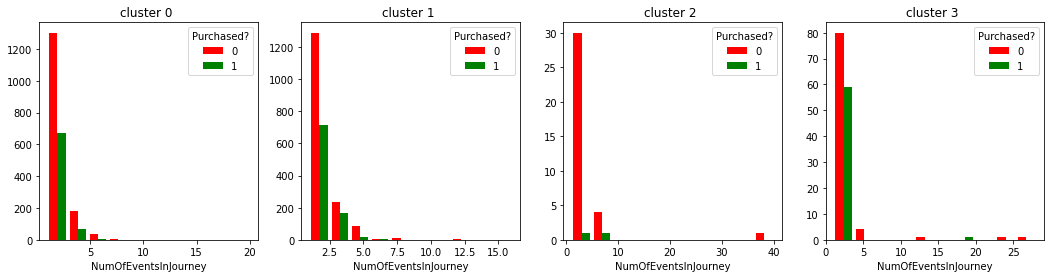

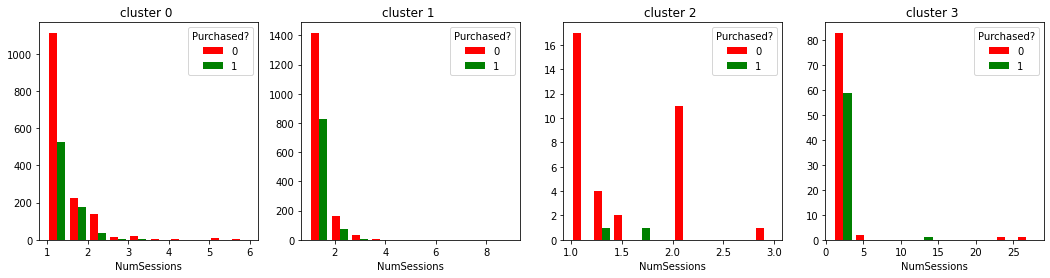

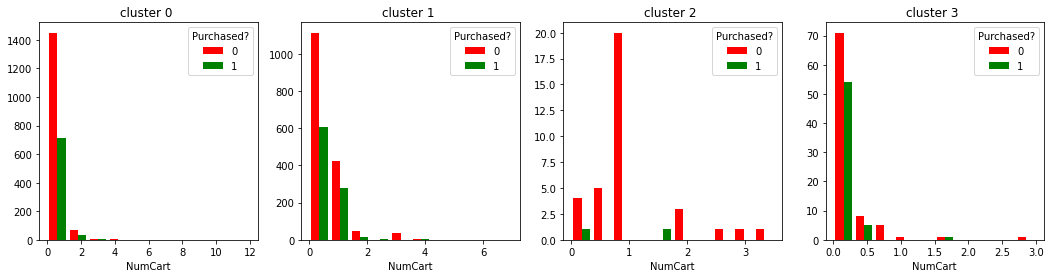

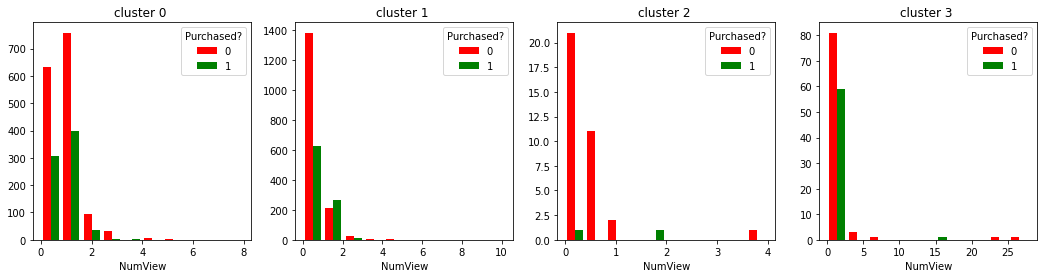

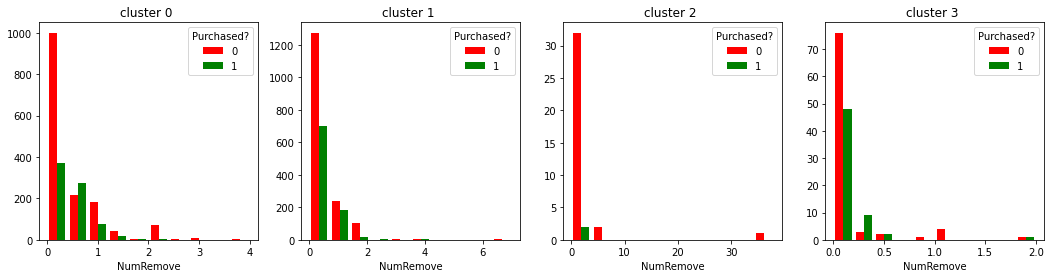

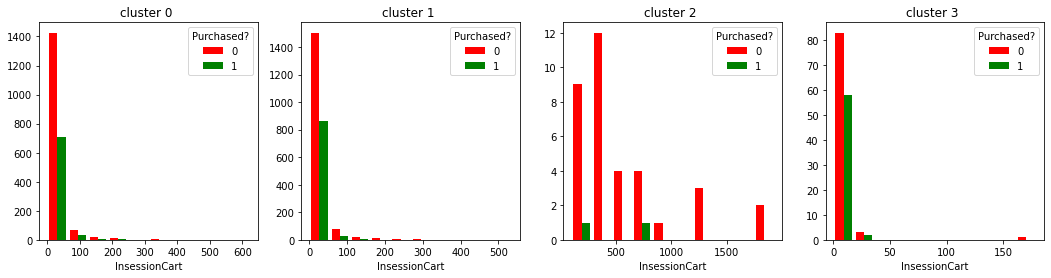

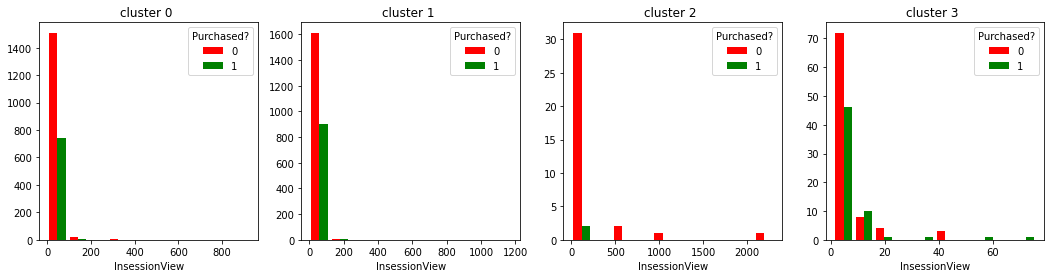

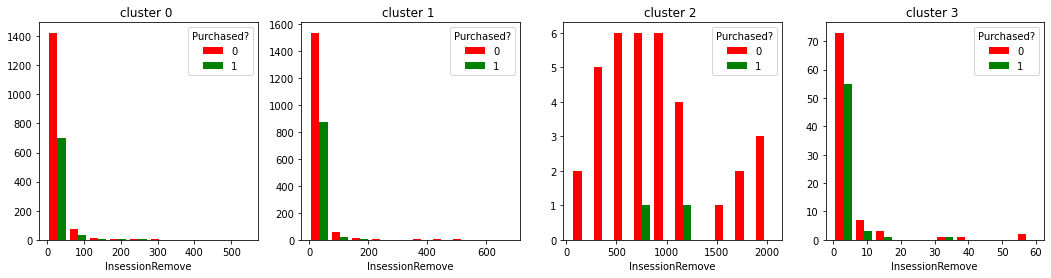

In [32]:
for col in ['NumOfEventsInJourney', 'NumSessions', 'NumCart', 'NumView'
            ,'NumRemove','InsessionCart','InsessionView', 'InsessionRemove']:       
    plot_hist(col)
  

Let's plot the histograms for `maxPrice` and `minPrice` as well.

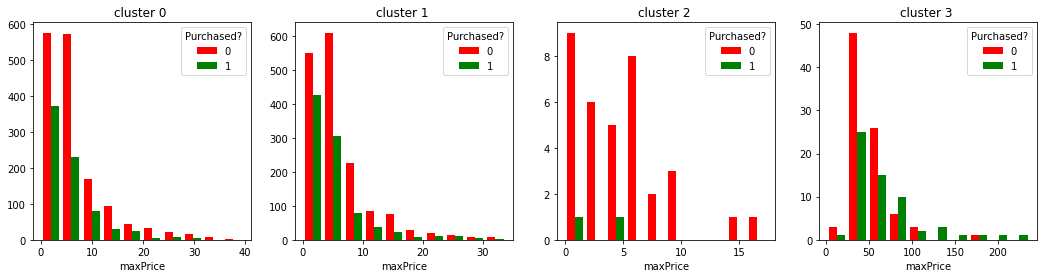

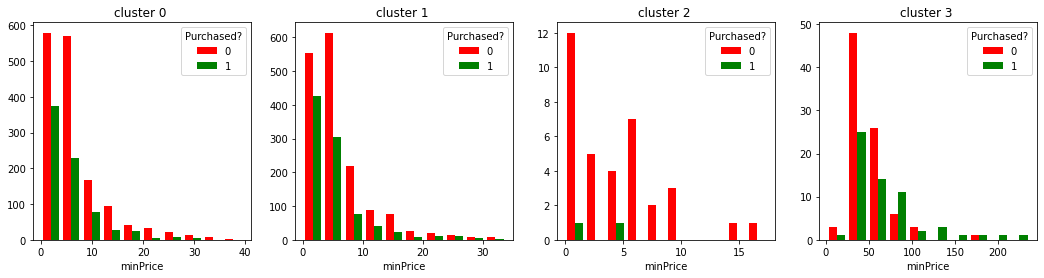

In [33]:
for col in ['maxPrice','minPrice']:       
    plot_hist(col)

From the histograms above we can observe that: 

    - Cluster 3 had the lowest number of customers who removed an item from the cart (NumRemove)
    - Cluster 3 `InsessionView` is the lowest and mainly below 20.
    - Cluster 3 has higher value customers.     
    - Cluster 2 which is the least valuable segment of the customers, has the highest `InsessionRemove`.
    - Cluster 0 and 1 don't really differ much. 

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*

In [35]:
# YOUR CODE HERE
from sklearn.cluster import SpectralClustering
import numpy as np
spectral_clustering = SpectralClustering(n_clusters=4,
                                assign_labels='discretize',
                                random_state=0).fit(X_reduced)

spectral_y_labels = spectral_clustering.labels_
spectral_clusters_size = pd.DataFrame(spectral_y_labels, 
                                      columns=['cluster']).value_counts().\
                                      reset_index().rename(columns={0:'size'})
spectral_clusters_size

,cluster,size
0,0,4986
1,3,8
2,1,4
3,2,2


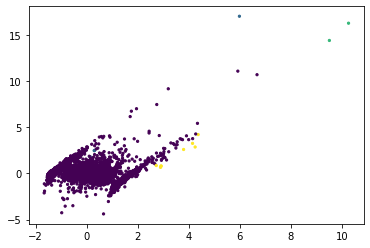

In [36]:
def plot_spectral(X, cluster_labels):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1], s=5, c=cluster_labels)
    plt.show() 
plot_spectral(X_reduced,spectral_y_labels) 

- By setting `assign_labels='kmeans'` we don't get good results with specral clustering and we end up with 2 clusters and the following warning:

    *Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  est = KMeans(*
  
- By setting `assign_labels='cluster_qr'` or `assign_labels='discretize'`, we get very similar results which still does not distinguish the high-value customers that was identified in cluster 3 of k-means. 

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*
    
Based on the work in part 10 of this notebook, cluster 3 is high-value customers and need to be given attention to. 
    - If there are any recommendations to be given to customers, this cluster will spend more so more expensive products. 
    - Cluster 2 is the least valuable so perhaps don't spend much time on them.
    - Cluster 0,1 can be treated in the same way; they are the majority of the customers and have average spending. 
    
        

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [37]:
# YOUR CODE HERE
new = pd.read_csv('../dat/new.csv.gz')

In [38]:
assert new.shape == (30091, 5)

In [39]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

<span style="color:green">**Answer**</span>

The `new` dataset has ~6 times more samples than the `past` dataset but it only has 5 columns (4 features) which are 
`['product_id', 'maxPrice', 'minPrice', 'Purchased?', 'Category']`

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [40]:
# YOUR CODE HERE
np.intersect1d(new['product_id'], past['product_id'])

array([], dtype=int64)

<span style="color:green">**Answer**</span>

There is 0 overlap on `product_id` in the 2 datasets.

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [41]:
new[new['Purchased?']==1]['Purchased?'].value_counts().iloc[0]/len(new)# YOUR CODE HERE .3448

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [42]:
# YOUR CODE HERE
# Not sure why we need to conver them to numpy array

X_train = past[new.columns].drop(['product_id', 'Purchased?'], axis=1).to_numpy()
y_train = y.to_numpy()
X_test = new.drop(['product_id'], axis=1)
y_test = X_test.pop('Purchased?')
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [43]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [44]:
# YOUR CODE HERE
def train(X_train,X_test, y_train, y_test, standardize = True) -> None:
    if standardize:
        pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(class_weight='balanced'))])
    else:
        pipe = Pipeline([('lr', LogisticRegression(class_weight='balanced'))])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))
    
train(X_train,X_test, y_train, y_test, standardize=True)


              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



<span style="color:red">**Question**</span>

Using `stardardize= False` will give the exact result; not sure why because the scale of `Category` is different from `minPrice` and `maxPrice`

<details>
<summary> Expected output </summary>

```
precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091

```
</details>


7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [45]:
# YOUR CODE HERE
X = np.concatenate((X_train, X_test), axis=0)

In [46]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [47]:
# YOUR CODE HERE
y = np.concatenate((y_train, np.full(y_test.shape, -1)))

In [48]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [49]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading
label_prop_model = LabelSpreading(kernel='knn', alpha=0.01)
label_prop_model.fit(X,y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [50]:
semi_sup_preds = label_prop_model.transduction_[y_train.shape[0]:]# YOUR CODE HERE

In [51]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [52]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.80      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.81      0.77      0.79     30091
weighted avg       0.82      0.82      0.81     30091



<details>
<summary> Expected output </summary>

```
             precision    recall  f1-score   support

           0       0.83      0.93      0.87     19732
           1       0.83      0.62      0.71     10359

    accuracy                           0.83     30091
   macro avg       0.83      0.78      0.79     30091
weighted avg       0.83      0.83      0.82     30091

```
</details>


Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.


<details>
<summary> Results from supervised learning </summary>

```
 precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091

```
</details>


    *YOUR ANSWER HERE*

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)